<img src="Archivos/miia.jpg" width=800x>

# Laboratorio 2

## Hito: desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

Este laboratorio corresponde al 34% de la calificación total del curso y su entrega está planteada para el final de la semana 8. Su objetivo es poner en práctica las competencias adquiridas sobre el uso de los paquetes Pandas, Seaborn y Scikit Learn, entre otros, para hacer exploración, análisis descriptivo, y abordar preguntas de negocio para un caso basado en datos reales. 

Especificamente, al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar una pregunta de negocio a partir de un contexto dado.
2. Cargar datos desde archivos utilizando métodos de Pandas.
3. Explorar, manejar, limpiar y agregar DataFrames.
5. Implementar análisis combinando métricas descriptivas, visualización, filtrado y agrupación.
6. Implementar análisis basado en modelos estadísticos o de machine learning.
7. Utilizar paquetes como ipywidgets o panel para agregar interactividad a los análisis de manera sencilla.

Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito completo de la actividad, y puedas desarrollar tu solución apuntando a él en cada paso.

##  Contexto: *Desigualdad y factores de éxito en Pruebas "Saber 11" (Colombia)*

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas *Saber 11*, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (p.ej., matemáticas, ciencias naturales), y se lleva a cabo dos veces al año, respondiendo a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes deben llenar un formulario que recoge información socio-demográfica y relacionada con la institución a la que pertenecen, con el fin de obtener evidencia respecto al desempeño de los estudiantes en la prueba según sus condiciones particulares.

<img src="Archivos/saberpro.png" width=700x>

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las Pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es *desigualdad y factores de éxito en las pruebas Saber 11*. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber11, generar un reporte acerca de sus características principales, e identificar qué partes de dicho contenido serán relevantes para el análisis.
* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones, y descriptivos en general.
* Abordar preguntas de negocio relacionadas con la problemática planteada, particularmente con respecto a los factores que puedan incidir significativamente en el puntaje de una persona que presenta la prueba; especialmente aquellos que se relacionen con mal desempeño.
* Generar una herramienta sencilla que permita a un usuario interactuar con alguno de los análisis realizados de forma relevante en el contexto del problema.

# 1. Entender el contenido de los archivos de datos

Esta misión consiste en hacerse una idea general del contenido de los datos y seleccionar un segmento de ellos que tenga potencial para los análisis propuestos.

Pautas generales:
* Leer los archivos de datos y agregarlos según sea necesario.
* Inspeccionar el archivo a partir de su encabezado, columnas, descripciones de las variables según su tipo (numéricas, categóricas).
* Definir un sub-conjunto de variables (e.g., una lista) que puedan ser relevantes para la problemática de interés.

Preguntas guía:
* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Podría eso afectar el análisis, y cómo abordarlo?

Esta misión corresponde a trabajo interno del analista, por lo cual no tiene un entregable para el cliente. Como entregable, puedes generar un reporte básico sobre el contenido de los archivos de datos, ya sea a través de la impresión de mensajes, la presentación de tablas resumen, u otros.

In [1]:
#Cargar Base de Datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import pyplot
import statistics as stat
import seaborn as sb
from sklearn.metrics import log_loss
import panel as pn
from colorama import init, Fore, Back, Style
from scipy.stats import norm
import panel as pn
from ipywidgets import interactive
import plotly.graph_objects as go
import pandas as pd
pn.extension('plotly')
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Leer archivo y Cargarlo
Dataset1 = pd.read_table('SB11_20191.TXT',sep='\u00AC', encoding ='utf-8', engine='python')
Dataset2 = pd.read_table('SB11_20201.txt',sep='\u00AC', encoding ='utf-8', engine='python')
Dataset3 = pd.read_table('SB11_20211.txt',sep='\u00AC', encoding ='utf-8', engine='python')
#Unir Dataframe
df = pd.concat([Dataset1, Dataset2,Dataset3])
df["y"] = (df["PUNT_GLOBAL"] > 250)*1

In [3]:
#Analisis Basico de la base de datos ¿Qué dimensiones tienen los datos?
columnas_filas=df.shape
tipo_datos=df.dtypes
Medidas_VNum=df.describe()
Medidas_Categoricas=df.describe(include='object')

print(Style.BRIGHT+ "No. COLUMNAS Y FILAS")
print(Style.NORMAL+str(columnas_filas))
print(Style.BRIGHT+ "TIPO DE DATOS")
print(Style.NORMAL+str(tipo_datos))
print(Style.BRIGHT+ "RESUMEN DE MEDIDAS PARA LAS VARIABLES NUMERICAS")
print(Style.NORMAL+str(Medidas_VNum))
print(Style.BRIGHT+ "RESUMEN DE MEDIDAS PARA LAS VARIABLES CATEGORICAS")
print(Style.NORMAL+str(Medidas_Categoricas))

No. COLUMNAS Y FILAS
(52046, 84)
TIPO DE DATOS
ESTU_TIPODOCUMENTO            object
ESTU_NACIONALIDAD             object
ESTU_GENERO                   object
ESTU_FECHANACIMIENTO          object
PERIODO                        int64
                              ...   
ESTU_NSE_ESTABLECIMIENTO     float64
ESTU_ESTADOINVESTIGACION      object
ESTU_GENERACION-E             object
PERCENTIL_ESPECIAL_GLOBAL    float64
y                              int32
Length: 84, dtype: object
RESUMEN DE MEDIDAS PARA LAS VARIABLES NUMERICAS
            PERIODO  ESTU_COD_RESIDE_DEPTO  ESTU_COD_RESIDE_MCPIO  \
count  52046.000000           51257.000000           51257.000000   
mean   20199.932675              43.161363           43248.364536   
std        8.318996              30.669486           30683.416385   
min    20191.000000               5.000000            5001.000000   
25%    20191.000000              11.000000           11001.000000   
50%    20201.000000              47.000000           47001

In [4]:
#¿Con cuántos años y periodos de evaluación se cuenta?
periodos = df.groupby('PERIODO')['ESTU_GENERO'].count()
print('Se cuenta con información para el primer semestre de los años 2019, 2020 y 2021 así:                                                '    + Style.BRIGHT+ str(periodos))

Se cuenta con información para el primer semestre de los años 2019, 2020 y 2021 así:                                                PERIODO
20191    21083
20201    15434
20211    15523
Name: ESTU_GENERO, dtype: int64


# RESUMEN DEL ANALISIS DE LA BASE CONFORME LOS RESULTADOS DESCRIPTIVOS

Conforme el análisis descriptivo de la base, se concluye lo siguiente:
1.  Excluir las siguientes variables por considerarlas irrelevantes o redudantes en el modelo:
*ESTU_TIPODOCUMENTO 
*ESTU_COD_RESIDE_MCPIO 
*ESTU_FECHANACIMIENTO
*COLE_COD_DANE_ESTABLECIMIENTO
*COLE_COD_DANE_SEDE 
*ESTU_CONSECUTIVO
*ESTU_NACIONALIDAD
*ESTU_ESTUDIANTE
*ESTU_ETNIA
*ESTU_COD_RESIDE_DEPTO
*ESTU_MCPIO_RESIDE 
*ESTU_PAIS_RESIDE
*ESTU_COD_RESIDE_MCPIO 
*COLE_COD_DANE_ESTABLECIMIENTO
*COLE_NOMBRE_ESTABLECIMIENTO 
*COLE_GENERO 
*COLE_COD_DANE_SEDE 
*COLE_NOMBRE_SEDE
*COLE_SEDE_PRINCIPAL
*COLE_COD_MCPIO_UBICACION
*COLE_MCPIO_UBICACION
*COLE_COD_DEPTO_UBICACION 
*COLE_DEPTO_UBICACION 
*ESTU_PRIVADO_LIBERTAD 
*ESTU_COD_MCPIO_PRESENTACION
*ESTU_MCPIO_PRESENTACION
*ESTU_DEPTO_PRESENTACION
*ESTU_COD_DEPTO_PRESENTACION
*ESTU_INSE_INDIVIDUAL
*ESTU_NSE_INDIVIDUAL
*ESTU_NSE_ESTABLECIMIENTO
*ESTU_ESTADOINVESTIGACION
*ESTU_GENERACION-E
*COLE_CODIGO_ICFES

2. Se excluyen las siguientes variables por tratarse de variables de respuesta
*PUNT_LECTURA_CRITICA
*PERCENTIL_LECTURA_CRITICA
*DESEMP_LECTURA_CRITICA
*PUNT_MATEMATICAS
*PERCENTIL_MATEMATICAS
*DESEMP_MATEMATICAS
*PUNT_C_NATURALES
*PERCENTIL_C_NATURALES
*DESEMP_C_NATURALES
*PUNT_SOCIALES_CIUDADANAS
*PERCENTIL_SOCIALES_CIUDADANAS
*DESEMP_SOCIALES_CIUDADANAS
*PUNT_INGLES
*PERCENTIL_INGLES
*DESEMP_INGLES
*PERCENTIL_GLOBAL
*PERCENTIL_ESPECIAL_GLOBAL

Dado los cortes de evaluación se concentra el estudio del modelo en calendario B al tratarse de las bases de primer semestre del año 2019, 2020 y 2021.

In [5]:
# Conforme la documentación de la base de datos y en el enfoque del modelo se considera necesario retirar las siguientes variables:
Lista_No_Interes=['PERIODO', 'COLE_CARACTER', 'ESTU_TIPOREMUNERACION', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENEHORNOMICROOGAS', 'ESTU_TIPODOCUMENTO' , 'ESTU_FECHANACIMIENTO', 'ESTU_PAIS_RESIDE',  'ESTU_NACIONALIDAD','ESTU_COD_RESIDE_MCPIO' ,'COLE_COD_DANE_ESTABLECIMIENTO' ,'COLE_COD_DANE_SEDE' ,
                  'ESTU_CONSECUTIVO' ,'ESTU_ESTUDIANTE' ,'ESTU_ETNIA' ,'ESTU_COD_RESIDE_DEPTO' ,'ESTU_MCPIO_RESIDE' ,'ESTU_COD_RESIDE_MCPIO' ,
                  'COLE_COD_DANE_ESTABLECIMIENTO' ,'COLE_NOMBRE_ESTABLECIMIENTO' ,'COLE_GENERO' ,'COLE_COD_DANE_SEDE' ,'COLE_NOMBRE_SEDE' ,
                  'COLE_SEDE_PRINCIPAL' ,'COLE_COD_MCPIO_UBICACION' ,'COLE_MCPIO_UBICACION' ,'COLE_COD_DEPTO_UBICACION' ,'COLE_DEPTO_UBICACION' ,
                  'ESTU_PRIVADO_LIBERTAD' ,'ESTU_COD_MCPIO_PRESENTACION' ,'ESTU_MCPIO_PRESENTACION' ,'ESTU_DEPTO_PRESENTACION' ,'ESTU_COD_DEPTO_PRESENTACION',
                  'ESTU_INSE_INDIVIDUAL' ,'ESTU_NSE_INDIVIDUAL' ,'ESTU_NSE_ESTABLECIMIENTO' ,'ESTU_ESTADOINVESTIGACION','PUNT_LECTURA_CRITICA' ,
                  'PERCENTIL_LECTURA_CRITICA' ,'DESEMP_LECTURA_CRITICA' ,'PUNT_MATEMATICAS' ,'PERCENTIL_MATEMATICAS' ,'DESEMP_MATEMATICAS' ,'PUNT_C_NATURALES' ,'PERCENTIL_C_NATURALES' ,
                  'DESEMP_C_NATURALES' ,'PUNT_SOCIALES_CIUDADANAS' ,'PERCENTIL_SOCIALES_CIUDADANAS' ,'DESEMP_SOCIALES_CIUDADANAS' ,'PUNT_INGLES' ,'PERCENTIL_INGLES' ,'DESEMP_INGLES' ,'PERCENTIL_GLOBAL', 'PERCENTIL_ESPECIAL_GLOBAL', 'ESTU_GENERACION-E', 'COLE_CODIGO_ICFES']

In [6]:
# ¿Cuáles variables pueden ser de interés para la problemática planteada?
df1=df.drop(Lista_No_Interes, inplace=False, axis=1)
df1.shape

(52046, 30)

In [7]:
# ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? 
# ¿Podría eso afectar el análisis, y cómo abordarlo?
missing_values_count = df1.isnull().sum()
na_ratio = ((df1.isnull().sum() / len(df1))*100).sort_values(ascending = False)
print('El porcentaje de Datos Perdidos por variables el siguiente:                                                                      ' + str(na_ratio))

El porcentaje de Datos Perdidos por variables el siguiente:                                                                      COLE_BILINGUE                    17.838066
FAMI_NUMLIBROS                    8.534758
FAMI_COMELECHEDERIVADOS           7.614418
FAMI_ESTRATOVIVIENDA              7.176344
FAMI_COMECEREALFRUTOSLEGUMBRE     7.093725
ESTU_DEDICACIONINTERNET           7.061061
FAMI_COMECARNEPESCADOHUEVO        7.007263
FAMI_TIENESERVICIOTV              7.003420
ESTU_DEDICACIONLECTURADIARIA      6.951543
FAMI_TIENEINTERNET                6.886216
FAMI_EDUCACIONPADRE               6.874688
FAMI_EDUCACIONMADRE               6.853553
FAMI_TIENECONSOLAVIDEOJUEGOS      5.583522
FAMI_SITUACIONECONOMICA           5.581601
FAMI_TRABAJOLABORPADRE            5.577758
FAMI_TIENEMOTOCICLETA             5.550859
FAMI_TRABAJOLABORMADRE            5.506667
FAMI_CUARTOSHOGAR                 5.464397
ESTU_HORASSEMANATRABAJA           5.410598
FAMI_TIENECOMPUTADOR              5.372171
FAMI_PERSON

In [8]:
#Imputacion Datos Faltantes
def imput_faltantes (df1): 
    df_copy = df1.copy()
    for i in df1: 
        if df_copy[i].dtypes == object:
            df_copy[i].fillna(df_copy[i].mode()[0] , inplace = True)
        else:
            df_copy[i].fillna(df_copy[i].mean() , inplace = True)
    return df_copy
df_imput = imput_faltantes(df1)
df_imput.head()
df_imput.isnull().sum()

ESTU_GENERO                      0
ESTU_TIENEETNIA                  0
ESTU_DEPTO_RESIDE                0
FAMI_ESTRATOVIVIENDA             0
FAMI_PERSONASHOGAR               0
FAMI_CUARTOSHOGAR                0
FAMI_EDUCACIONPADRE              0
FAMI_EDUCACIONMADRE              0
FAMI_TRABAJOLABORPADRE           0
FAMI_TRABAJOLABORMADRE           0
FAMI_TIENEINTERNET               0
FAMI_TIENESERVICIOTV             0
FAMI_TIENECOMPUTADOR             0
FAMI_TIENEMOTOCICLETA            0
FAMI_TIENECONSOLAVIDEOJUEGOS     0
FAMI_NUMLIBROS                   0
FAMI_COMELECHEDERIVADOS          0
FAMI_COMECARNEPESCADOHUEVO       0
FAMI_COMECEREALFRUTOSLEGUMBRE    0
FAMI_SITUACIONECONOMICA          0
ESTU_DEDICACIONLECTURADIARIA     0
ESTU_DEDICACIONINTERNET          0
ESTU_HORASSEMANATRABAJA          0
COLE_NATURALEZA                  0
COLE_CALENDARIO                  0
COLE_BILINGUE                    0
COLE_AREA_UBICACION              0
COLE_JORNADA                     0
PUNT_GLOBAL         

In [9]:
#Analisis sobre las variables seleccionadas
#Analisis Basico de la base de datos ¿Qué dimensiones tienen los datos?
columnas_filas=df_imput.shape
tipo_datos=df_imput.dtypes
Medidas_VNum=df_imput.describe()
Medidas_Categoricas=df_imput.describe(include='object')

print(Style.BRIGHT+ "No. COLUMNAS Y FILAS")
print(Style.NORMAL+str(columnas_filas))
print(Style.BRIGHT+ "TIPO DE DATOS")
print(Style.NORMAL+str(tipo_datos))
print(Style.BRIGHT+ "RESUMEN DE MEDIDAS PARA LAS VARIABLES NUMERICAS")
print(Style.NORMAL+str(Medidas_VNum))
print(Style.BRIGHT+ "RESUMEN DE MEDIDAS PARA LAS VARIABLES CATEGORICAS")
print(Style.NORMAL+str(Medidas_Categoricas))

No. COLUMNAS Y FILAS
(52046, 30)
TIPO DE DATOS
ESTU_GENERO                      object
ESTU_TIENEETNIA                  object
ESTU_DEPTO_RESIDE                object
FAMI_ESTRATOVIVIENDA             object
FAMI_PERSONASHOGAR               object
FAMI_CUARTOSHOGAR                object
FAMI_EDUCACIONPADRE              object
FAMI_EDUCACIONMADRE              object
FAMI_TRABAJOLABORPADRE           object
FAMI_TRABAJOLABORMADRE           object
FAMI_TIENEINTERNET               object
FAMI_TIENESERVICIOTV             object
FAMI_TIENECOMPUTADOR             object
FAMI_TIENEMOTOCICLETA            object
FAMI_TIENECONSOLAVIDEOJUEGOS     object
FAMI_NUMLIBROS                   object
FAMI_COMELECHEDERIVADOS          object
FAMI_COMECARNEPESCADOHUEVO       object
FAMI_COMECEREALFRUTOSLEGUMBRE    object
FAMI_SITUACIONECONOMICA          object
ESTU_DEDICACIONLECTURADIARIA     object
ESTU_DEDICACIONINTERNET          object
ESTU_HORASSEMANATRABAJA          object
COLE_NATURALEZA                  

# Análisis variables seleccionadas para el modelo

Conforme las estadisticas generadas de la base se tiene en cuenta el siguiente resumen sobre los aspectos más relevantes:

1. El puntaje global presenta una media de 289, un percentil 75 de 340 y un puntaje máximo de 495.
2. En la variable generó se observa una distribución muy homogénea de la base.
3. La distribución de la variable etnia cuenta con pocas observaciones de tipo positivo, sin embargo se incluye en el modelo para evaluar su significancia.
4. En el departamento de residencia llama la atención la concentración de pruebas realizadas en Valle.
5. En la variable estrato se encuentra una importante participación del estrato 3.
6. En la variable numero de personas en el hogar se encuentra importante concentración en el rango 3 a 4 personas.
7. En la variable tiempo de dedicación de lectura diaria se identifica una concentración importante en el rango de 30 minutos o menos.
8. Por el contrario en la variable dedicación al internet se identifica una concentración importante en el rango de 1 a 3 horas.
9. El 97% de la base esta concentrada en los colegios no oficiales.
10. El 74% de la base corresponde a calendario B.
11. En promedio un 83% de la base se encuentra ubicada en zonas urbanas, los colegios no son bilingues y son de caracter únicamente acádemico.
12. El 49% de la base corresponde a jornada de estudio completa.


# 2. Identificar características y relaciones en las variables

Esta misión consiste en utilizar análisis descriptivos para explorar patrones o relaciones en las variables de interés para la problemática planteada.

Pautas generales:
* Utilizar Matplotlib y/o Seaborn para inspeccionar visualmente variables de interés; los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser de utilidad.
* Utilizar el método `groupby` de Pandas, en conjunto con la visualización, para proveer evidencia sobre el impacto de variables socio-demográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:
* ¿Hay patrones de interés en las distribuciones de las variables, o en las relaciones entre ellas?
* ¿Existe algún impacto significativo de variables socio-demográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables vale la pena hacer un análisis más profundo?

El entregable de esta misión es un reporte (p.ej., un conjunto de visualizaciones) que de cuenta de los comportamientos más interesantes que se observen en las variables de interés para el contexto propuesto. El propósito de esta exploración es generar hipótesis o preguntas que guíen análisis más profundos. En ese sentido, con base en lo aprendido en esta sección, identifique las tres preguntas analíticas que plantearía con mayor prioridad, teniendo en cuenta el contexto y los datos disponibles; estas preguntas NO se deben abordar en términos de código para el laboratorio (únicamente formularse).

Conclusión: Dada la distribución observada donde existe una leve diferenciación en el puntaje por género.


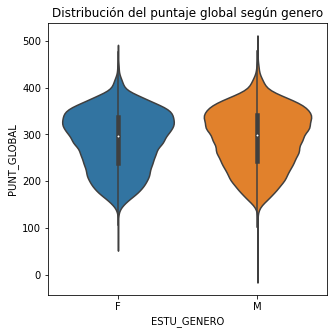

In [10]:
#Descriptivo de Variables
fig, ax = plt.subplots(figsize=(5, 5))

sns.violinplot(x     = 'ESTU_GENERO', y='PUNT_GLOBAL', data  = df_imput,
        #color = "white",
        ax    = ax
    )

ax.set_title('Distribución del puntaje global según genero')

print('Conclusión: Dada la distribución observada donde existe una leve diferenciación en el puntaje por género.')

Conclusión: Dada la distribución observada respecto al puntaje por etnia se mantiene del modelo.


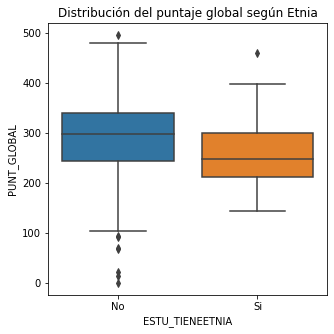

In [11]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.boxplot(
        x     = 'ESTU_TIENEETNIA',
        y     = 'PUNT_GLOBAL',
        data  = df_imput,
        #color = "white",
        ax    = ax
    )

ax.set_title('Distribución del puntaje global según Etnia')

print('Conclusión: Dada la distribución observada respecto al puntaje por etnia se mantiene del modelo.')

Conclusión: Dada la distribución observada del puntaje respecto al depto de residencia se mantiene del modelo, se observa un   comportamiento diferencial en Bogotá, Santander, Atlantico, Quindio y Bolivar.


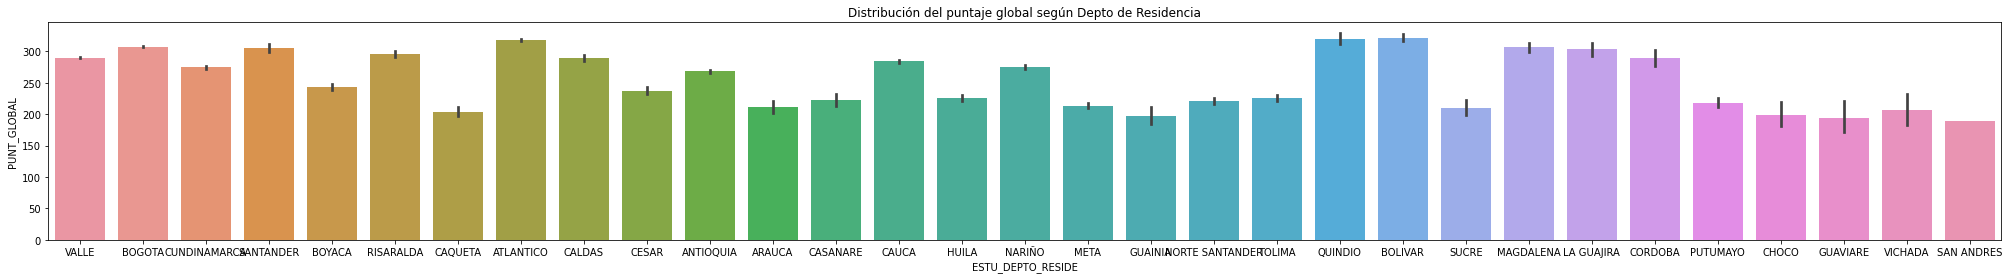

In [12]:
#Grafico 
fig, ax = plt.subplots(figsize=(35, 4))
sns.barplot(x="ESTU_DEPTO_RESIDE", y="PUNT_GLOBAL", data=df_imput)
ax.set_title('Distribución del puntaje global según Depto de Residencia')
print('Conclusión: Dada la distribución observada del puntaje respecto al depto de residencia se mantiene del modelo, se observa un   comportamiento diferencial en Bogotá, Santander, Atlantico, Quindio y Bolivar.')

Conclusión: Dada la distribución observada del puntaje respecto al estrato se mantiene del modelo.


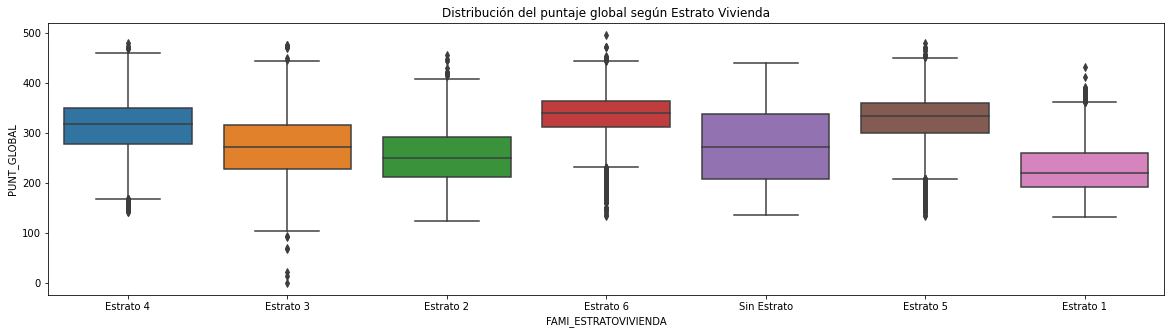

In [13]:
#
fig, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(x='FAMI_ESTRATOVIVIENDA', y='PUNT_GLOBAL', data=df_imput)
ax.set_title('Distribución del puntaje global según Estrato Vivienda')
print('Conclusión: Dada la distribución observada del puntaje respecto al estrato se mantiene del modelo.')

Conclusión: Dada la distribución observada del puntaje respecto al numero de personas a cargo se mantiene del modelo, ya que se evidencia correlación donde a mayor número de personas a cargo menor es el puntaje.


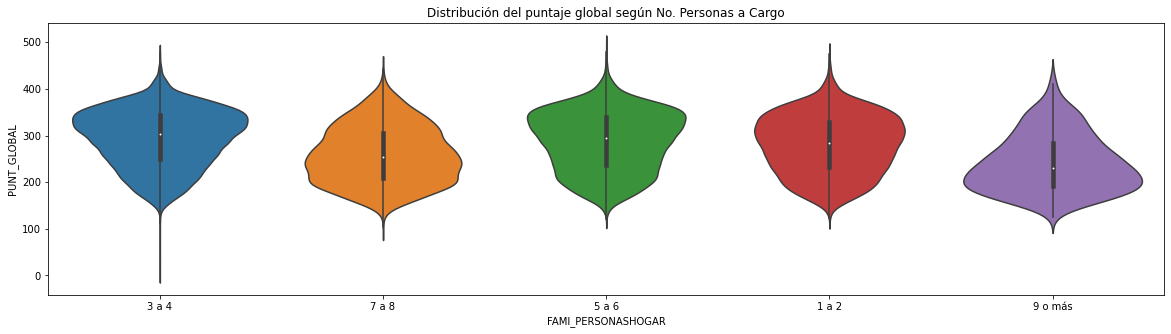

In [14]:
#
fig, ax = plt.subplots(figsize=(20, 5))
sns.violinplot(x='FAMI_PERSONASHOGAR', y='PUNT_GLOBAL', data=df_imput)
ax.set_title('Distribución del puntaje global según No. Personas a Cargo')
print('Conclusión: Dada la distribución observada del puntaje respecto al numero de personas a cargo se mantiene del modelo, ya que se evidencia correlación donde a mayor número de personas a cargo menor es el puntaje.')

Conclusión: Dada la distribución observada del puntaje respecto al numero de cuartos en el hogar se mantiene del modelo, sujeto a revisión de la significancia.


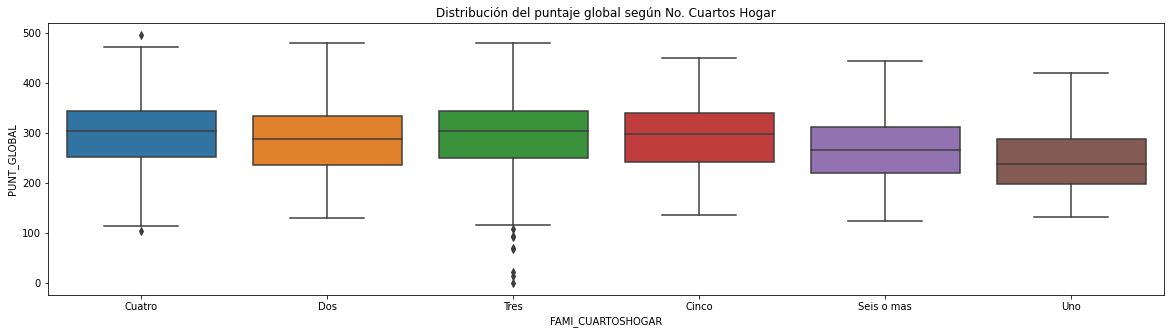

In [15]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(x='FAMI_CUARTOSHOGAR', y='PUNT_GLOBAL', data=df_imput)
ax.set_title('Distribución del puntaje global según No. Cuartos Hogar')
print('Conclusión: Dada la distribución observada del puntaje respecto al numero de cuartos en el hogar se mantiene del modelo, sujeto a revisión de la significancia.')

Conclusión: Dada la distribución observada del puntaje respecto a la educcación del padre se mantiene en el modelo, donde se observa correlación de menor puntaje a menor nivel de estudios.


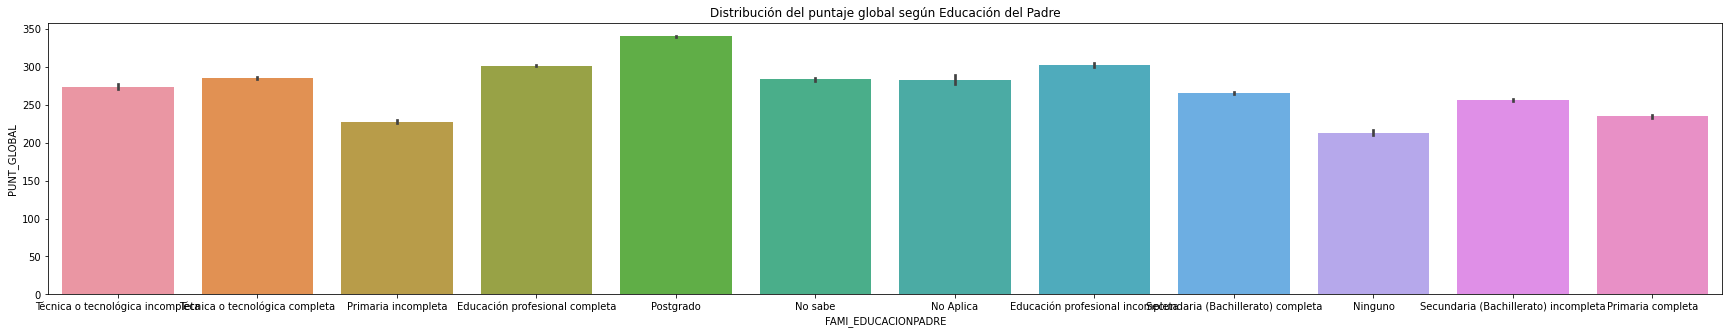

In [16]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x='FAMI_EDUCACIONPADRE', y='PUNT_GLOBAL', data=df_imput)
ax.set_title('Distribución del puntaje global según Educación del Padre')
print('Conclusión: Dada la distribución observada del puntaje respecto a la educcación del padre se mantiene en el modelo, donde se observa correlación de menor puntaje a menor nivel de estudios.')

Conclusión: Dada la distribución observada del puntaje respecto a la educcación del madre se mantiene en el modelo, donde se   observa correlación de menor puntaje a menor nivel de estudios.


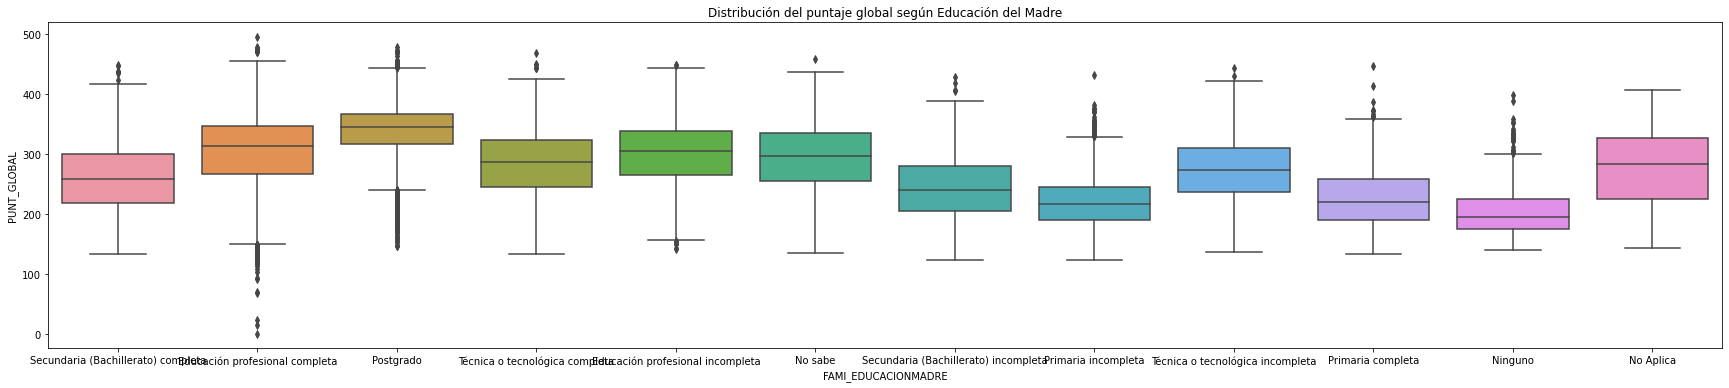

In [17]:
#
fig, ax = plt.subplots(figsize=(30, 6))
sns.boxplot(x='FAMI_EDUCACIONMADRE', y='PUNT_GLOBAL', data=df_imput)
ax.set_title('Distribución del puntaje global según Educación del Madre')
print('Conclusión: Dada la distribución observada del puntaje respecto a la educcación del madre se mantiene en el modelo, donde se   observa correlación de menor puntaje a menor nivel de estudios.')

Conclusión: Dada la distribución observada del puntaje respecto al acceso a internet se mantiene en el modelo, donde se   observa correlación de menor puntaje a menor acceso.


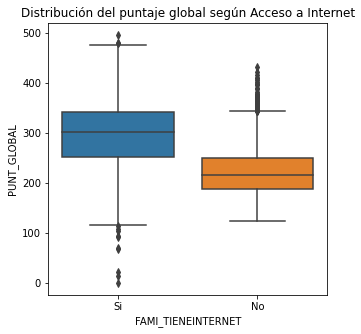

In [18]:
#
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x='FAMI_TIENEINTERNET', y='PUNT_GLOBAL', data=df_imput)
ax.set_title('Distribución del puntaje global según Acceso a Internet')
print('Conclusión: Dada la distribución observada del puntaje respecto al acceso a internet se mantiene en el modelo, donde se   observa correlación de menor puntaje a menor acceso.')

Conclusión: Dada la distribución observada del puntaje respecto al acceso a TV se mantiene en el modelo, donde se   observa    correlación de menor puntaje a menor acceso.


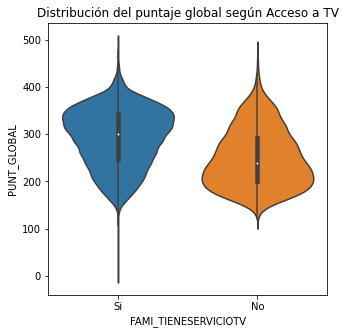

In [19]:
#
fig, ax = plt.subplots(figsize=(5,5))
sns.violinplot(x='FAMI_TIENESERVICIOTV', y='PUNT_GLOBAL', data=df_imput)
ax.set_title('Distribución del puntaje global según Acceso a TV')
print('Conclusión: Dada la distribución observada del puntaje respecto al acceso a TV se mantiene en el modelo, donde se   observa    correlación de menor puntaje a menor acceso.')

Conclusión: Dada la distribución observada del puntaje respecto al acceso a Computador se mantiene en el modelo, donde se      observa correlación de menor puntaje a menor acceso.


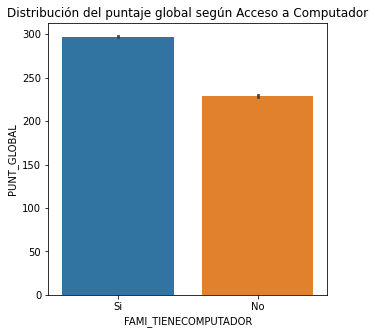

In [20]:
#
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(x='FAMI_TIENECOMPUTADOR', y='PUNT_GLOBAL', data=df_imput)
ax.set_title('Distribución del puntaje global según Acceso a Computador')
print('Conclusión: Dada la distribución observada del puntaje respecto al acceso a Computador se mantiene en el modelo, donde se      observa correlación de menor puntaje a menor acceso.')

Conclusión: Dada la distribución observada del puntaje respecto a tener moto se mantiene en el modelo, donde se      observa correlación de menor puntaje si tiene moto.


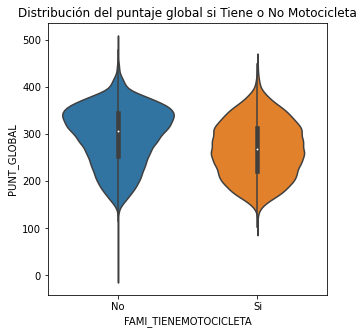

In [21]:
#
fig, ax = plt.subplots(figsize=(5, 5))
sns.violinplot(x='FAMI_TIENEMOTOCICLETA', y='PUNT_GLOBAL', data=df_imput)
ax.set_title('Distribución del puntaje global si Tiene o No Motocicleta')
print('Conclusión: Dada la distribución observada del puntaje respecto a tener moto se mantiene en el modelo, donde se      observa correlación de menor puntaje si tiene moto.')

Conclusión: Dada la distribución observada del puntaje respecto a tener consolda se mantiene en el modelo, donde se      observa correlación de menor puntaje si no tiene consola.


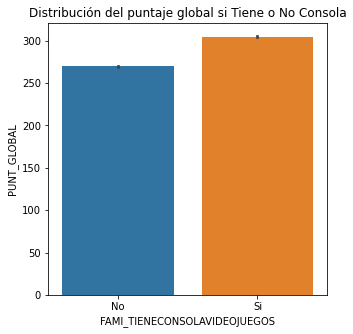

In [22]:
#
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(x='FAMI_TIENECONSOLAVIDEOJUEGOS', y='PUNT_GLOBAL', data=df_imput)
ax.set_title('Distribución del puntaje global si Tiene o No Consola')
print('Conclusión: Dada la distribución observada del puntaje respecto a tener consolda se mantiene en el modelo, donde se      observa correlación de menor puntaje si no tiene consola.')

Conclusión: Dada la distribución observada del puntaje respecto al numero de libros se mantiene en el modelo, donde se      observa correlación de menor puntaje a menor numero de libros.


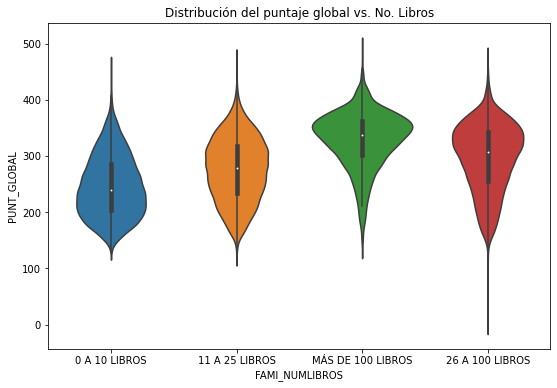

In [23]:
#
fig, ax = plt.subplots(figsize=(9, 6))
sns.violinplot(x='FAMI_NUMLIBROS', y='PUNT_GLOBAL', data=df_imput)
ax.set_title('Distribución del puntaje global vs. No. Libros')
print('Conclusión: Dada la distribución observada del puntaje respecto al numero de libros se mantiene en el modelo, donde se      observa correlación de menor puntaje a menor numero de libros.')

Conclusión: Dada la distribución observada del puntaje respecto al consumo de lacteos se mantiene en el modelo, donde se      observa correlación de menor puntaje a menor consumo de lacteos.


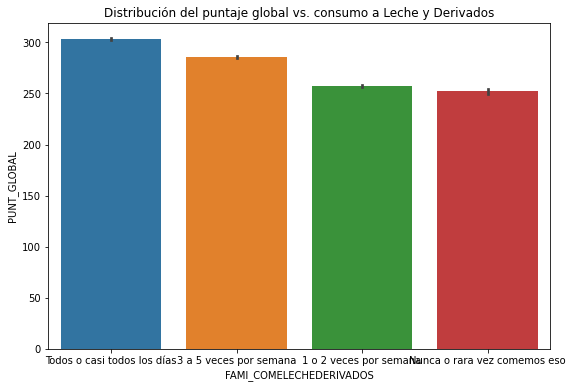

In [24]:
#
fig, ax = plt.subplots(figsize=(9, 6))
sns.barplot(x='FAMI_COMELECHEDERIVADOS', y='PUNT_GLOBAL', data=df_imput)
ax.set_title('Distribución del puntaje global vs. consumo a Leche y Derivados')
print('Conclusión: Dada la distribución observada del puntaje respecto al consumo de lacteos se mantiene en el modelo, donde se      observa correlación de menor puntaje a menor consumo de lacteos.')

Conclusión: Dada la distribución observada del puntaje respecto al consumo de pescado y huevo se mantiene en el modelo, donde  se observa correlación de menor puntaje a menor consumo.


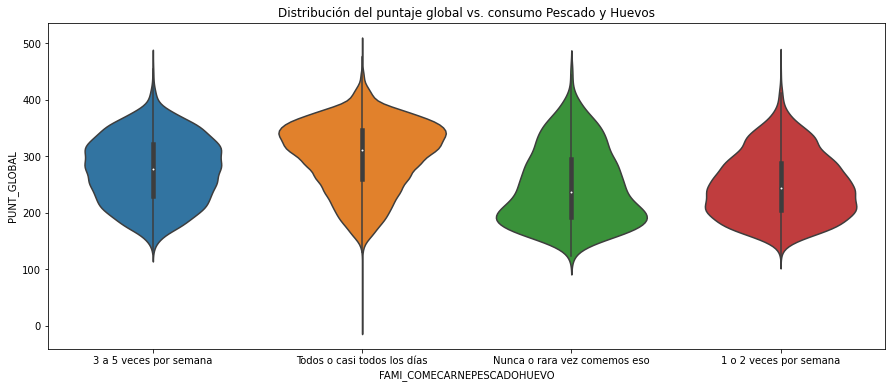

In [25]:
#
fig, ax = plt.subplots(figsize=(15, 6))
sns.violinplot(x='FAMI_COMECARNEPESCADOHUEVO', y='PUNT_GLOBAL', data=df_imput)
ax.set_title('Distribución del puntaje global vs. consumo Pescado y Huevos')
print('Conclusión: Dada la distribución observada del puntaje respecto al consumo de pescado y huevo se mantiene en el modelo, donde  se observa correlación de menor puntaje a menor consumo.')

Conclusión: Dada la distribución observada del puntaje respecto al consumo de Frutas y Legumbres se mantiene en el modelo,     donde  se observa correlación de menor puntaje a menor consumo.


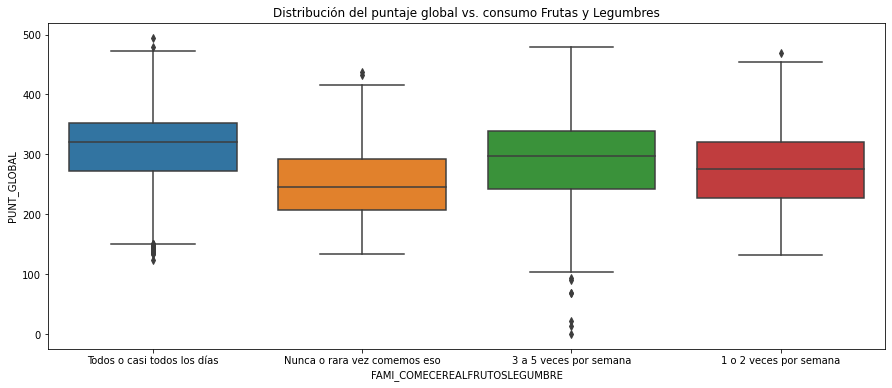

In [26]:
#
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(x='FAMI_COMECEREALFRUTOSLEGUMBRE', y='PUNT_GLOBAL', data=df_imput)
ax.set_title('Distribución del puntaje global vs. consumo Frutas y Legumbres')
print('Conclusión: Dada la distribución observada del puntaje respecto al consumo de Frutas y Legumbres se mantiene en el modelo,     donde  se observa correlación de menor puntaje a menor consumo.')

Conclusión: Dada la distribución observada del puntaje respecto a la Dedicación a la Lectura se mantiene en el modelo, donde se observa correlación de menor puntaje a menor dedicación.


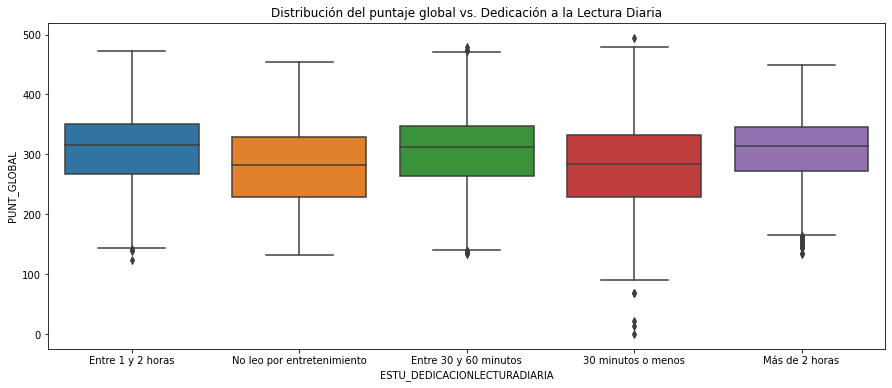

In [27]:
#
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(x='ESTU_DEDICACIONLECTURADIARIA', y='PUNT_GLOBAL', data=df_imput)
ax.set_title('Distribución del puntaje global vs. Dedicación a la Lectura Diaria')
print('Conclusión: Dada la distribución observada del puntaje respecto a la Dedicación a la Lectura se mantiene en el modelo, donde se observa correlación de menor puntaje a menor dedicación.')

Conclusión: Dada la distribución observada del puntaje respecto a la Dedicación a Internet se mantiene en el modelo, donde se observa correlación de menor puntaje a menor dedicación.


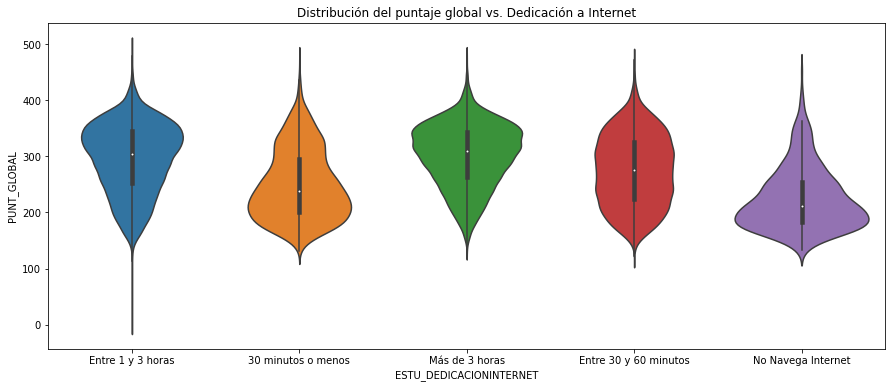

In [28]:
#
fig, ax = plt.subplots(figsize=(15, 6))
sns.violinplot(x='ESTU_DEDICACIONINTERNET', y='PUNT_GLOBAL', data=df_imput)
ax.set_title('Distribución del puntaje global vs. Dedicación a Internet')
print('Conclusión: Dada la distribución observada del puntaje respecto a la Dedicación a Internet se mantiene en el modelo, donde se observa correlación de menor puntaje a menor dedicación.')

Conclusión: Dada la distribución observada del puntaje respecto a la Naturaleza del Colegio se mantiene en el modelo, donde se observa correlación de mayor puntaje en colegio no oficial.


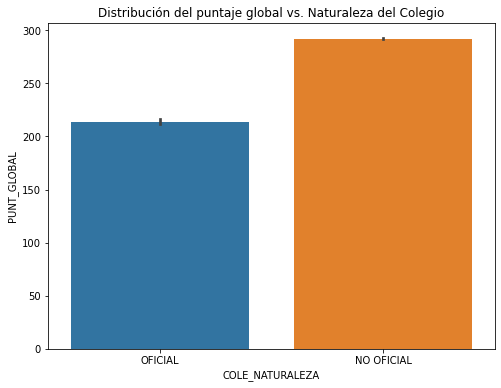

In [29]:
#
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='COLE_NATURALEZA', y='PUNT_GLOBAL', data=df_imput)
ax.set_title('Distribución del puntaje global vs. Naturaleza del Colegio')
print('Conclusión: Dada la distribución observada del puntaje respecto a la Naturaleza del Colegio se mantiene en el modelo, donde se observa correlación de mayor puntaje en colegio no oficial.')

Conclusión: Dada la distribución observada del puntaje respecto al Calendario del Colegio se mantiene en el modelo, donde se observa correlación de mayor puntaje en colegio Calendario B.


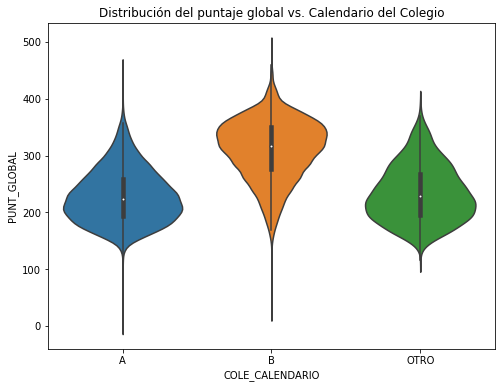

In [30]:
#
fig, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x='COLE_CALENDARIO', y='PUNT_GLOBAL', data=df_imput)
ax.set_title('Distribución del puntaje global vs. Calendario del Colegio')
print('Conclusión: Dada la distribución observada del puntaje respecto al Calendario del Colegio se mantiene en el modelo, donde se observa correlación de mayor puntaje en colegio Calendario B.')

Conclusión: Dada la distribución observada del puntaje respecto al Colegio Bilingue se mantiene en el modelo, donde se observa correlación de mayor puntaje en colegio Bilingue.


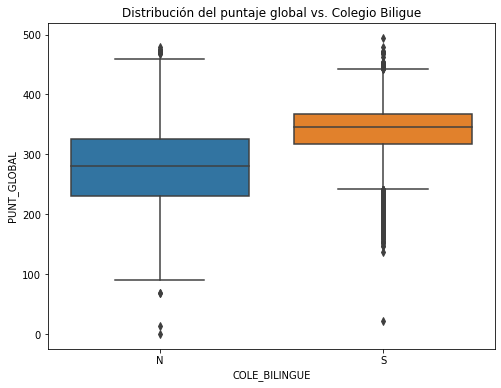

In [31]:
#
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='COLE_BILINGUE', y='PUNT_GLOBAL', data=df_imput)
ax.set_title('Distribución del puntaje global vs. Colegio Biligue')
print('Conclusión: Dada la distribución observada del puntaje respecto al Colegio Bilingue se mantiene en el modelo, donde se observa correlación de mayor puntaje en colegio Bilingue.')

Conclusión: Dada la distribución observada del puntaje respecto a Ubicación Colegio se mantiene en el modelo, donde se observa correlación de mayor puntaje en zona Rural sin embargo presenta muchos outliers que deben ser evaluados.


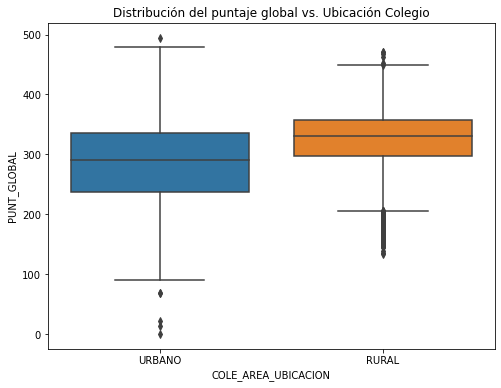

In [32]:
#
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='COLE_AREA_UBICACION', y='PUNT_GLOBAL', data=df_imput)
ax.set_title('Distribución del puntaje global vs. Ubicación Colegio')
print('Conclusión: Dada la distribución observada del puntaje respecto a Ubicación Colegio se mantiene en el modelo, donde se observa correlación de mayor puntaje en zona Rural sin embargo presenta muchos outliers que deben ser evaluados.')

Conclusión: Dada la distribución observada del puntaje respecto a Jornada del Colegio se mantiene en el modelo, donde se       observa correlación de la intensidad horaria y puntaje, siendo sabatina, noche y tarde las más bajas.


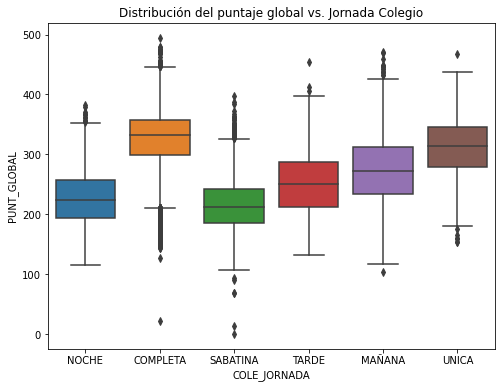

In [33]:
#
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='COLE_JORNADA', y='PUNT_GLOBAL', data=df_imput)
ax.set_title('Distribución del puntaje global vs. Jornada Colegio')
print('Conclusión: Dada la distribución observada del puntaje respecto a Jornada del Colegio se mantiene en el modelo, donde se       observa correlación de la intensidad horaria y puntaje, siendo sabatina, noche y tarde las más bajas.')

Text(0.5, 1.0, 'Distribución del puntaje global')

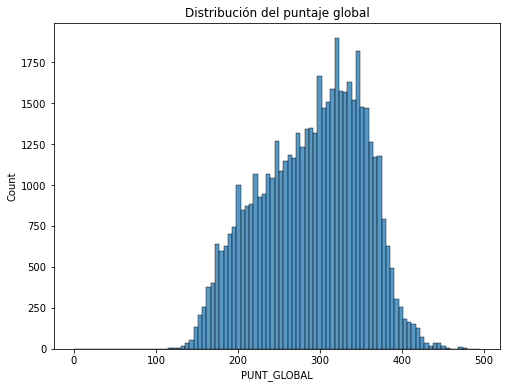

In [34]:
#
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(data=df_imput, x="PUNT_GLOBAL")
ax.set_title('Distribución del puntaje global')

Basados en la inspección de variables se concluye retirar las siguientes sobre las cuales no se genero gráfico descriptivo al ver la distribución de los datos respecto a la variable de respuesta puntaje global:
1. FAMI_TRABAJOLABORPADRE
2. FAMI_TRABAJOLABORMADRE
3. FAMI_TIENEMOTOCICLETA
4. FAMI_TIENECONSOLAVIDEOJUEGOS
5. FAMI_SITUACIONECONOMICA
6. ESTU_HORASSEMANATRABAJA


# Preguntas Análiticas

*1. ¿Cúal es el modelo a aplicar para identificar los factores que inciden en el mal desempeño de los estudiantes del país en la prueba Saber 11?*


*2. A partir de este modelo, ¿cuáles son los factores sociodemográficos que inciden en mayor medida en el mal desempeño de los estudiantes, considerando estudiante en riesgo los casos que se encuentren por debajo del percentil $\alpha$ de más de la mitad de la población, que por parte del estado podrían ser tenidos en cuenta para la definición de las políticas públicas.*

*3. A partir de este modelo, ¿cuáles son las variables respecto a las instituciones asociadas con la calidad de la educación que afectan el desempeño de los estudiantes en la prueba Saber 11?*




# 3. Abordar preguntas de negocio planteadas

Esta misión consiste en proponer, implementar y evaluar el desempeño modelo(s) que busque(n) explicar las relaciones entre factores socio-demográficos y desempeño en la prueba.

Pautas generales:
* Seleccionar variables y proponer modelos acordes a dichas variables y al contexto del problema.
* Utilizar los paquetes StatsModels y Scikit Learn para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Particularmente, las clases correspondientes a regresión lineal y regresión logística, entre otras, pueden ser útiles.
* Utilizar las métricas de evaluación de desempeño (disponibles en los paquetes mencionados), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:
* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?
* Definiendo como "estudiante en riesgo" a quien tenga un puntaje por debajo del percentil $\alpha$ en más de la mitad de las áreas de la prueba, ¿cuáles variables socio-demográficas permitirían "predecir" si un estudiante pertenecerá a dicho grupo?

El entregable de esta misión es un reporte sobre el desempeño de los modelos propuestos para abordar al menos una de las preguntas guía planteadas, acompañado de una conclusión sobre los resultados del modelo (si son válidos) en el contexto de la problemática planteada.

In [35]:
#Modificacion Variables Categoricas
df_final = pd.get_dummies(df_imput, columns = ['ESTU_GENERO','ESTU_TIENEETNIA','ESTU_DEPTO_RESIDE','FAMI_ESTRATOVIVIENDA',
'FAMI_PERSONASHOGAR','FAMI_CUARTOSHOGAR','FAMI_EDUCACIONPADRE','FAMI_EDUCACIONMADRE',
'FAMI_TIENEINTERNET','FAMI_TIENESERVICIOTV','FAMI_TIENECOMPUTADOR','FAMI_NUMLIBROS','FAMI_COMELECHEDERIVADOS',
'FAMI_COMECARNEPESCADOHUEVO','FAMI_COMECEREALFRUTOSLEGUMBRE','ESTU_DEDICACIONLECTURADIARIA','ESTU_DEDICACIONINTERNET',
'COLE_NATURALEZA','COLE_CALENDARIO','COLE_BILINGUE','COLE_AREA_UBICACION','COLE_JORNADA'], drop_first = True)

In [36]:
[x for x in df_final]

['FAMI_TRABAJOLABORPADRE',
 'FAMI_TRABAJOLABORMADRE',
 'FAMI_TIENEMOTOCICLETA',
 'FAMI_TIENECONSOLAVIDEOJUEGOS',
 'FAMI_SITUACIONECONOMICA',
 'ESTU_HORASSEMANATRABAJA',
 'PUNT_GLOBAL',
 'y',
 'ESTU_GENERO_M',
 'ESTU_TIENEETNIA_Si',
 'ESTU_DEPTO_RESIDE_ARAUCA',
 'ESTU_DEPTO_RESIDE_ATLANTICO',
 'ESTU_DEPTO_RESIDE_BOGOTA',
 'ESTU_DEPTO_RESIDE_BOLIVAR',
 'ESTU_DEPTO_RESIDE_BOYACA',
 'ESTU_DEPTO_RESIDE_CALDAS',
 'ESTU_DEPTO_RESIDE_CAQUETA',
 'ESTU_DEPTO_RESIDE_CASANARE',
 'ESTU_DEPTO_RESIDE_CAUCA',
 'ESTU_DEPTO_RESIDE_CESAR',
 'ESTU_DEPTO_RESIDE_CHOCO',
 'ESTU_DEPTO_RESIDE_CORDOBA',
 'ESTU_DEPTO_RESIDE_CUNDINAMARCA',
 'ESTU_DEPTO_RESIDE_GUAINIA',
 'ESTU_DEPTO_RESIDE_GUAVIARE',
 'ESTU_DEPTO_RESIDE_HUILA',
 'ESTU_DEPTO_RESIDE_LA GUAJIRA',
 'ESTU_DEPTO_RESIDE_MAGDALENA',
 'ESTU_DEPTO_RESIDE_META',
 'ESTU_DEPTO_RESIDE_NARIÑO',
 'ESTU_DEPTO_RESIDE_NORTE SANTANDER',
 'ESTU_DEPTO_RESIDE_PUTUMAYO',
 'ESTU_DEPTO_RESIDE_QUINDIO',
 'ESTU_DEPTO_RESIDE_RISARALDA',
 'ESTU_DEPTO_RESIDE_SAN ANDRES',
 'ESTU

In [37]:
#Declaración de Variables
y=df_final[["y"]]
X=df_final.drop (['PUNT_GLOBAL', 'y', 'FAMI_TRABAJOLABORPADRE','FAMI_TRABAJOLABORMADRE','FAMI_TIENEMOTOCICLETA','FAMI_TIENECONSOLAVIDEOJUEGOS', 'FAMI_SITUACIONECONOMICA', 
'ESTU_HORASSEMANATRABAJA'], inplace=False, axis=1)

In [38]:
#Separar base de entrenamiento y base de prueba 
#Entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =123)
# Declaramos una instancia del modelo
lr = LogisticRegression()
#entrenar el modelo
lr.fit(X_train, y_train)
# Utilizamos el modelo para predecir
y_pred = lr.predict(X_test)

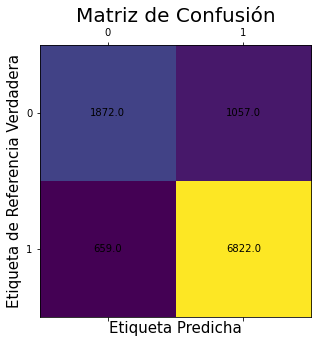

In [39]:
#Matriz de Confusion
y_pred= lr.predict(X_test)
y_true=y_test
cm=confusion_matrix(y_true, y_pred)
fig, ax=plt.subplots(figsize=(10,5))
ax.matshow(cm)
plt.title('Matriz de Confusión',fontsize=20)
plt.ylabel('Etiqueta de Referencia Verdadera',fontsize=15)
plt.xlabel('Etiqueta Predicha',fontsize=15)
for(i,j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.64      0.69      2929
           1       0.87      0.91      0.89      7481

    accuracy                           0.84     10410
   macro avg       0.80      0.78      0.79     10410
weighted avg       0.83      0.84      0.83     10410



In [41]:
print('Accuracy del modelo:')
print(lr.score(X_test, y_test))

Accuracy del modelo:
0.8351585014409222


Regresión Logística Modelo 1: ROC AUC=  0.8917155507962838


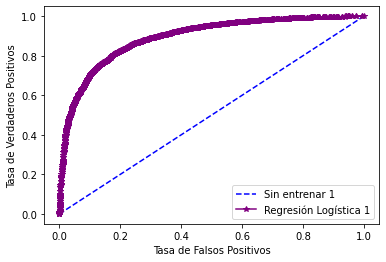

In [42]:
#AUC y Curva ROC
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = lr.predict_proba(X_test)

# PREDECIR las probabilidades
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

print('Regresión Logística Modelo 1: ROC AUC= ' ,lr_auc)

# las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, color='blue',linestyle='--', label='Sin entrenar 1')
pyplot.plot(lr_fpr, lr_tpr, color='purple', marker='*', label='Regresión Logística 1')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

In [43]:
# Matriz de Predictores
modelo = sm.Logit(endog=y_train, exog=X_train)
modelo = modelo.fit()
print(modelo.summary())

         Current function value: 0.365196
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41636
Model:                          Logit   Df Residuals:                    41534
Method:                           MLE   Df Model:                          101
Date:                Tue, 30 Nov 2021   Pseudo R-squ.:                  0.3880
Time:                        22:25:38   Log-Likelihood:                -15205.
converged:                      False   LL-Null:                       -24844.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
ESTU_GENERO_M                                   

In [44]:
#Calculo de las predicciones
y_pred = lr.predict(X_test)
y_test["predicciones_probabilidades"] = lr_probs
y_test["predicciones"] = y_pred
y_test.head()

,y,predicciones_probabilidades,predicciones
19404,1,0.980122,1
8254,0,0.226311,0
20651,0,0.302968,0
342,1,0.801212,1
8669,1,0.992224,1


In [45]:
#Prueba de Bondad de Ajuste
from scipy.stats import chi2_contingency
kf =chi2_contingency(y_test["predicciones_probabilidades"])

print('chisq-statistic=%.4f, p-value=%.4f, df=%i expected_frep=%s'%kf)

chisq-statistic=0.0000, p-value=1.0000, df=0 expected_frep=[0.98012239 0.2263106  0.30296765 ... 0.7291238  0.98871532 0.95391917]


<BarContainer object of 102 artists>

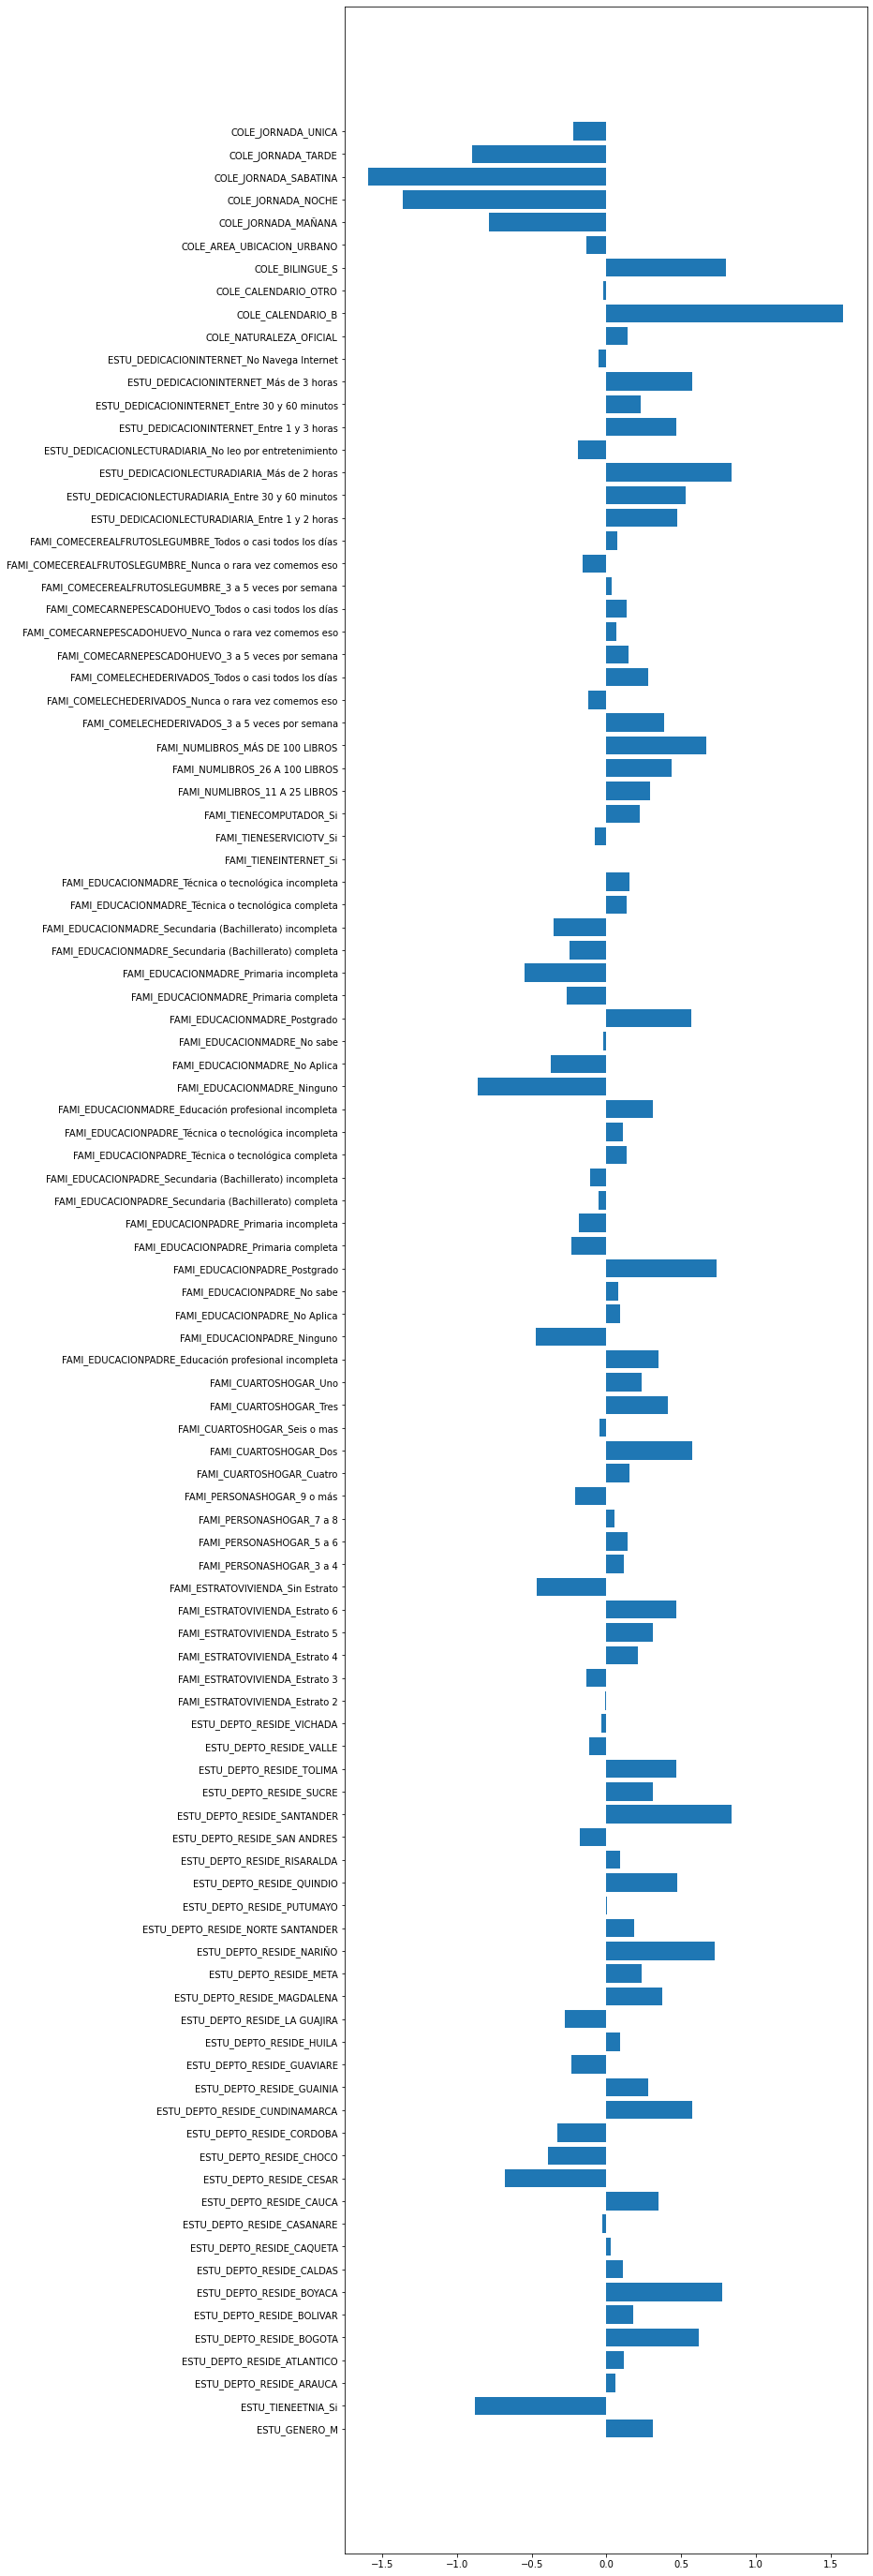

In [46]:
#Peso de las Variables
importance = lr.coef_[0]
x = 10
y = 50
plt.figure(figsize = (x,y))
pyplot.barh(X_test.columns, importance)

In [47]:
#Modificacion Variables Categoricas para segundo Modelo
df_final_2 = pd.get_dummies(df_imput, columns = ['ESTU_GENERO','ESTU_TIENEETNIA','ESTU_DEPTO_RESIDE','FAMI_ESTRATOVIVIENDA',
'FAMI_PERSONASHOGAR','FAMI_CUARTOSHOGAR','FAMI_EDUCACIONPADRE','FAMI_EDUCACIONMADRE',
'FAMI_TIENECOMPUTADOR','FAMI_NUMLIBROS','FAMI_COMELECHEDERIVADOS','FAMI_COMECARNEPESCADOHUEVO','FAMI_COMECEREALFRUTOSLEGUMBRE','ESTU_DEDICACIONLECTURADIARIA','ESTU_DEDICACIONINTERNET','COLE_CALENDARIO','COLE_BILINGUE','COLE_AREA_UBICACION',
'COLE_JORNADA'], drop_first = True)

In [48]:
#Declaración de Variables segundo modelo se descartan las variables 'COLE_NATURALEZA','FAMI_TIENESERVICIOTV','FAMI_TIENEINTERNET' dada su baja significancia en el modelo anterior.

y2=df_final_2[["y"]]
X2=df_final_2.drop (['PUNT_GLOBAL', 'y', 'FAMI_TRABAJOLABORPADRE','FAMI_TRABAJOLABORMADRE','FAMI_TIENEMOTOCICLETA','FAMI_TIENECONSOLAVIDEOJUEGOS', 'FAMI_SITUACIONECONOMICA', 
'ESTU_HORASSEMANATRABAJA', 'COLE_NATURALEZA','FAMI_TIENESERVICIOTV','FAMI_TIENEINTERNET'], inplace=False, axis=1)

In [49]:
#Separar base de entrenamiento y base de prueba 
#Entrenamiento y test
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size=0.2, random_state =123)
# Declaramos una instancia del modelo
lr2 = LogisticRegression()
#entrenar el modelo
lr2.fit(X_train_2, y_train_2)
# Utilizamos el modelo para predecir
y_pred_2 = lr2.predict(X_test_2)

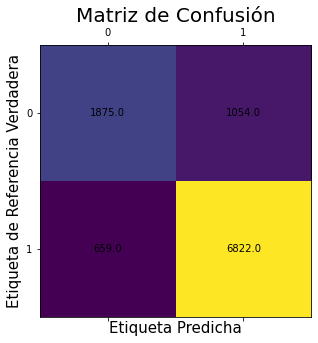

In [50]:
#Matriz de Confusion
y_pred_2= lr2.predict(X_test_2)
y_true_2=y_test_2
cm=confusion_matrix(y_true_2, y_pred_2)
fig, ax=plt.subplots(figsize=(10,5))
ax.matshow(cm)
plt.title('Matriz de Confusión',fontsize=20)
plt.ylabel('Etiqueta de Referencia Verdadera',fontsize=15)
plt.xlabel('Etiqueta Predicha',fontsize=15)
for(i,j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [51]:
print(classification_report(y_test_2, y_pred_2))

              precision    recall  f1-score   support

           0       0.74      0.64      0.69      2929
           1       0.87      0.91      0.89      7481

    accuracy                           0.84     10410
   macro avg       0.80      0.78      0.79     10410
weighted avg       0.83      0.84      0.83     10410



In [52]:
print('Accuracy del modelo:')
print(lr2.score(X_test_2, y_test_2))

Accuracy del modelo:
0.8354466858789625


Regresión Logística Modelo 2: ROC AUC=  0.8917155507962838


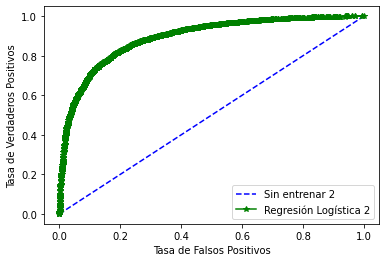

In [53]:
#AUC y Curva ROC
ns_probs_2 = [0 for _ in range(len(y_test_2))]
lr_probs_2 = lr2.predict_proba(X_test_2)

# PREDECIR las probabilidades
lr_probs_2 = lr_probs_2[:, 1]
ns_auc_2 = roc_auc_score(y_test_2, ns_probs_2)
lr_auc_2 = roc_auc_score(y_test_2, lr_probs_2)

print('Regresión Logística Modelo 2: ROC AUC= ' ,lr_auc)

# las curvas ROC
ns_fpr2, ns_tpr2, _ = roc_curve(y_test_2, ns_probs_2)
lr_fpr2, lr_tpr2, _ = roc_curve(y_test_2, lr_probs_2)
# las curvas ROC
pyplot.plot(ns_fpr2, ns_tpr2, color='blue',linestyle='--', label='Sin entrenar 2')
pyplot.plot(lr_fpr2, lr_tpr2, color='green', marker='*', label='Regresión Logística 2')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

In [54]:
# Matriz de Predictores
modelo2 = sm.Logit(endog=y_train_2, exog=X_train_2)
modelo2 = modelo2.fit()
print(modelo2.summary())

         Current function value: 0.365372
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41636
Model:                          Logit   Df Residuals:                    41537
Method:                           MLE   Df Model:                           98
Date:                Tue, 30 Nov 2021   Pseudo R-squ.:                  0.3877
Time:                        22:25:44   Log-Likelihood:                -15213.
converged:                      False   LL-Null:                       -24844.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
ESTU_GENERO_M                                   

In [55]:
#Calculo de las predicciones
y_pred2 = lr2.predict(X_test_2)
y_test_2["predicciones_probabilidades"] = lr_probs
y_test_2["predicciones"] = y_pred2
y_test_2.head()

,y,predicciones_probabilidades,predicciones
19404,1,0.980122,1
8254,0,0.226311,0
20651,0,0.302968,0
342,1,0.801212,1
8669,1,0.992224,1


In [56]:
#Prueba de Bondad de Ajuste
from scipy.stats import chi2_contingency
kf =chi2_contingency(y_test_2["predicciones_probabilidades"])

print('chisq-statistic=%.4f, p-value=%.4f, df=%i expected_frep=%s'%kf)

chisq-statistic=0.0000, p-value=1.0000, df=0 expected_frep=[0.98012239 0.2263106  0.30296765 ... 0.7291238  0.98871532 0.95391917]


<BarContainer object of 99 artists>

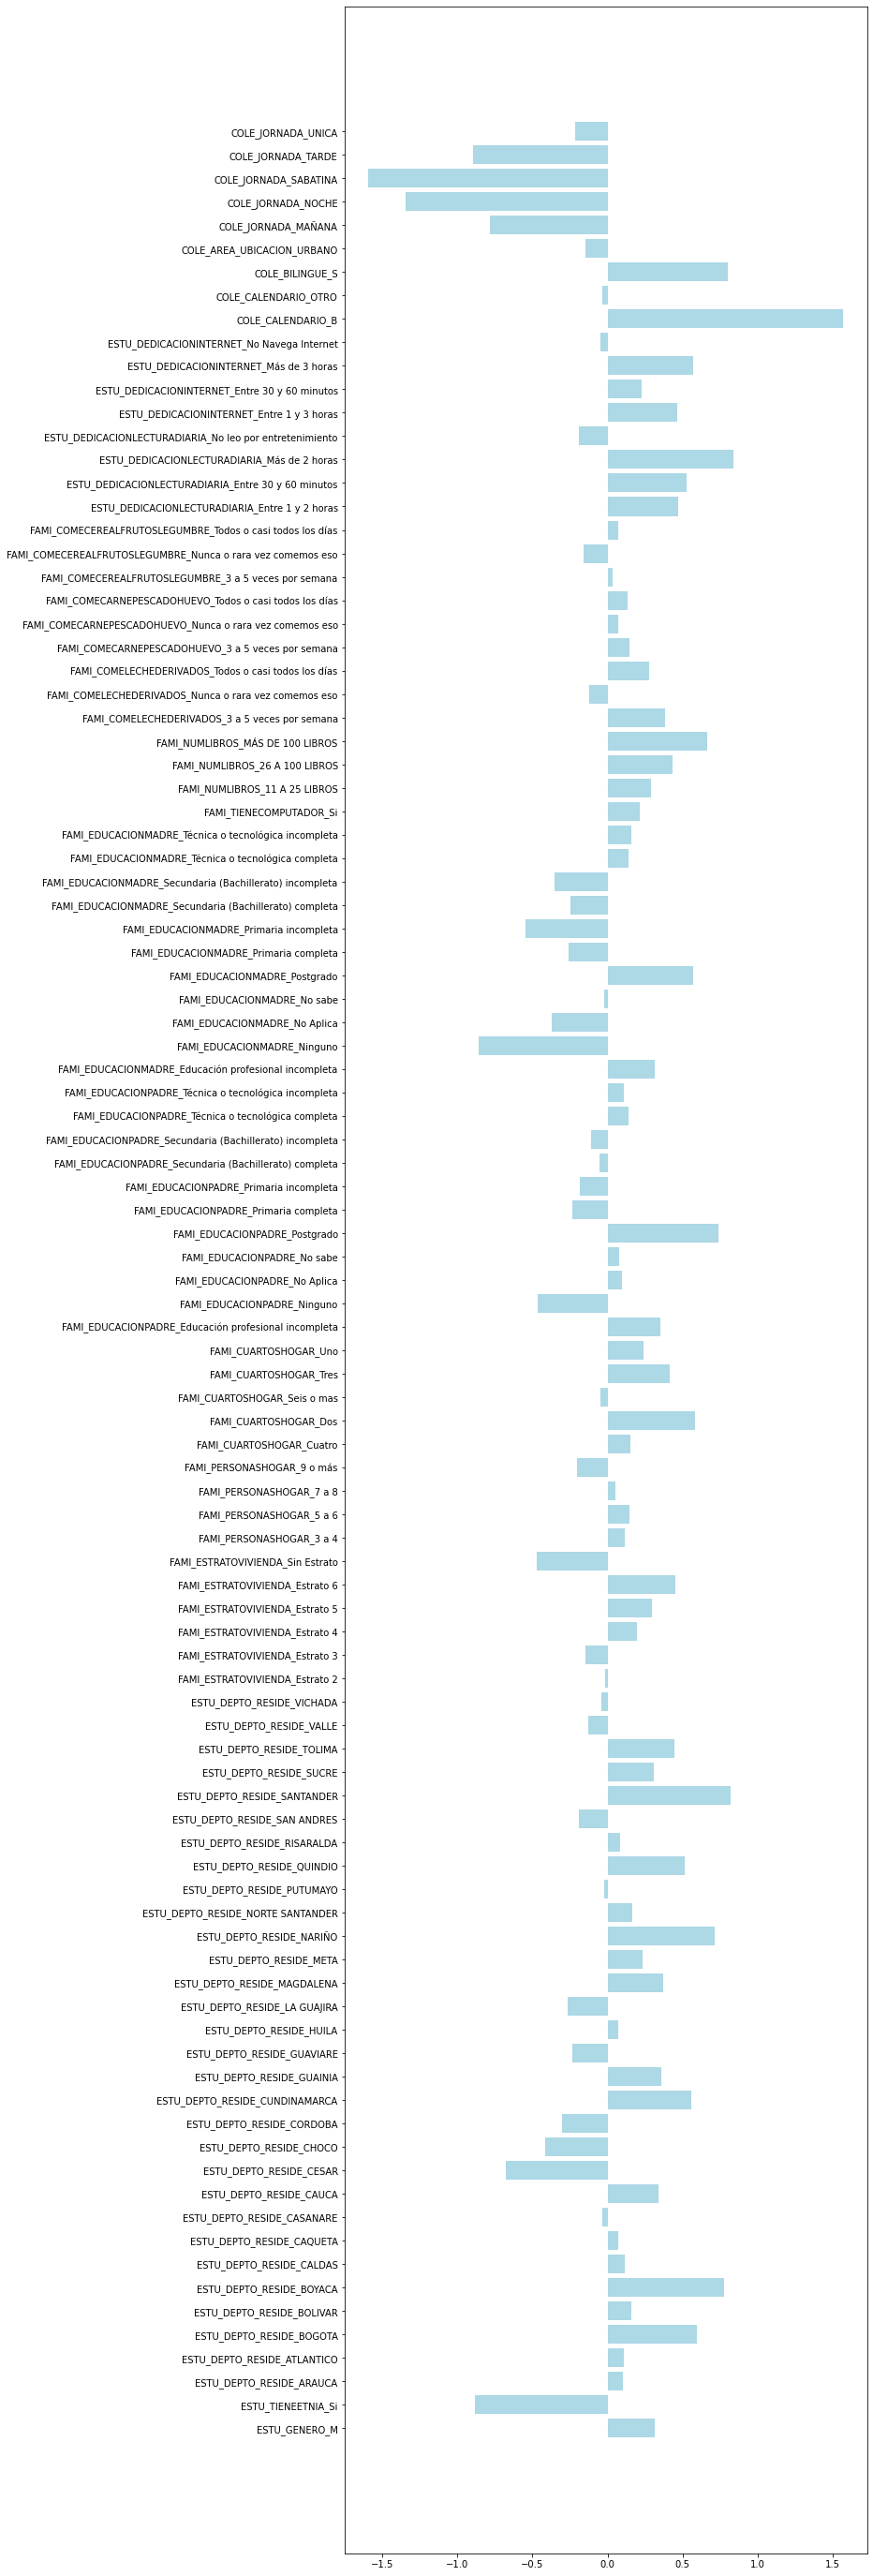

In [57]:
#Peso de las Variables
importance = lr2.coef_[0]
x = 10
y = 50
plt.figure(figsize = (x,y))
pyplot.barh(X_test_2.columns, importance, color="lightblue")

# Conclusiones a partir del modelo
1. El modelo a aplicar donde se identifican los factores que inciden en el mal desempeño será el modelo 2, donde se tienen en cuenta 3 variables menos y el accuracy mejora levemente de 83.52% a 83.54% y se mantiene el AUC en 89.17%, siendo considero con un excelente desempeño.


2. A partir de dicho modelo se evidencia que los factores sociodemográficos que inciden en mayor medida en el mal desempeño de los estudiantes son:

   a. El departamento donde se encuentra el estudiante siendo departamentos como San Andrés, Guaviare y Vichada las zonas     donde se identifica mayor afectación en el desempeño.
   
   b. Se evidencia correlación entre un menor nivel educativo del padre o madre a un menor desempeño en el examen.
   
   c. Los casos que reportan más de 9 personas a cargo evidencian peor desempeño, que los demás niveles en esta variable.
   
   d. El subconjunto de estudiantes que reportan no realizar lectura.
   
   e. El subconjunto de estudiantes que reportan no navegar en internet.
   
   f. El subconjunto de estudiantes que reportan no frutos o legumbres evidencian.
   
   g. En su orden los estudiantes que reportan no consumir leche o sus derivados.
   
   h. El estrato socioeconómico del estudiante, también presenta correlación con dicho desempeño, siendo los casos que no    reportan estrato los de peor desempeño.
   

3. A partir de este modelo, las variables respecto a las instituciones asociadas con la calidad de la educación que afectan el desempeño de los estudiantes en la prueba Saber 11, son: 

   a. La jornada estudiantil observando que los estudiantes en jornada sabatina, nocturna y tarde en su orden tiene peor     puntaje que la jornada mañana y única.
    
   b. El calendario al que pertenece la institución educativa, siendo calendario A con un peor desempeño respecto a calendario B.
    
En conclusión, los estudiantes con mejor desempeño, se encuentran en zonas urbanas, tienen acceso a todos los alimentos (frutos, legumbres, leche, derivados), realizar lectura en un mayor numero de horas, pertenecen a calendario B 

# 4. Desarrollar una herramienta interactiva de análisis

Esta misión consiste en desarrollar una herramienta interactiva sencilla (que sea relevante en el contexto del problema) a partir de alguno de los análisis realizados en las secciones 2 o 3.

Pautas generales:
* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar los parámetros que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar los paquetes `ipywidgets` o `panel` para implementar la herramienta.

Pregunta guía:
* ¿Cuál(es) es la pregunta que el usuario podrá hacerle a la herramienta, y cómo aporta al análisis?
* ¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta basada en los datos?

El entregable de esta misión es la herramienta implementada, acompañada de las instrucciones necesarias para que un usuario la pueda utilizar.

# Herramienta Interactiva
1. Mediante esta herramienta el usuario podrá seleccionar de un set de 7 variables, consideradas relevantes en la predicción de catalogar un estudiante en riesgo y realizar las combinaciones que considere relevantes, para tal fin debe seleccionar cada una de las variables y sus posibles combinaciones con las demás y observar la distribución en términos del puntaje de dicha población.
2. El usuario podrá identificar a través del uso de la herramienta la distribución del puntaje de la población y en consecuencia los patrones de comportamiento en términos del desempeño en la prueba.


In [58]:
def valores_filtro_columna(columna):
    columna = columna.astype(str)       # Convertimos en str los valores de la columna que entra por parámetro.
    valores = columna.unique().tolist() # Guardamos una lista con los valores únicos de la columna que entra por parámetro.
    valores = sorted(valores)           # Organizamos la lista de valores únicos de manera ascedente.
    valores.insert(0, "Todos")          # Agregamos el elemento "Todos" en la primera posición de la lista.
    return valores 

In [59]:
#Barra Deslizante
import ipywidgets as widgets

In [60]:
seleccion = widgets.Output()

In [61]:
Puntaje = widgets.IntSlider(min = 1.0, max = 500.0, step = 1.0)
Internet = widgets.Dropdown(
                        description = 'Internet:',
                        options = df['ESTU_DEDICACIONINTERNET'].unique().tolist(),
                        style = {'description_width': 'initial'}       # Mostrar el nombre completo.
                       )
Estrato = widgets.Dropdown(
                        description = 'Estrato:',
                        options = df['FAMI_ESTRATOVIVIENDA'].unique().tolist(),
                        style = {'description_width': 'initial'}       # Mostrar el nombre completo.
                       )
NumLibros = widgets.Dropdown(
                        description = 'No.Libros:',
                        options = df['FAMI_NUMLIBROS'].unique().tolist(),
                        style = {'description_width': 'initial'}       # Mostrar el nombre completo.
                       )
LecturaDiaria = widgets.Dropdown(
                        description = 'LecturaDiaria:',
                        options = df['ESTU_DEDICACIONLECTURADIARIA'].unique().tolist(),
                        style = {'description_width': 'initial'}       # Mostrar el nombre completo.
                       )
Calendario = widgets.Dropdown(
                        description = 'Calendario:',
                        options = df['COLE_CALENDARIO'].unique().tolist(),
                        style = {'description_width': 'initial'}       # Mostrar el nombre completo.
                       )
Jornada = widgets.Dropdown(
                        description = 'Jornada:',
                        options = df['COLE_JORNADA'].unique().tolist(),
                        style = {'description_width': 'initial'}       # Mostrar el nombre completo.
                       )
Bilingue = widgets.Dropdown(
                        description = 'Bilingue:',
                        options = df['COLE_BILINGUE'].unique().tolist(),
                        style = {'description_width': 'initial'}       # Mostrar el nombre completo.
                       )
fig = go.FigureWidget(
                        data = go.Histogram(name = 'PUNT_GLOBAL'),  
    
                        layout = go.Layout(
                                            title = 'Puntaje Global Prueba Saber 11',
                                            xaxis_title = 'Puntaje',
                                            yaxis_title = 'No.Casos',
                                          )
                     )

In [62]:
def filtrar():
    filtrar_lista = [i and j and k and l and m and o and p for i, j, k, l, m, o, p in zip(
                                                                                            df['ESTU_DEDICACIONINTERNET'] == Internet.value, 
                                                                                            df['FAMI_ESTRATOVIVIENDA'] == Estrato.value,
                                                                                            df['FAMI_NUMLIBROS'] == NumLibros.value,
                                                                                            df['ESTU_DEDICACIONLECTURADIARIA'] == LecturaDiaria.value,
                                                                                            df['COLE_CALENDARIO'] == Calendario.value,
                                                                                            df['COLE_JORNADA'] == Jornada.value,
                                                                                            df['COLE_BILINGUE'] == Bilingue.value
    )
                    ]
    
    df_temporal = df[filtrar_lista]
    fig.data[0].x = df_temporal['PUNT_GLOBAL'] # Establecemos los datos en el eje x.

In [63]:
def respuesta(change):
    filtrar()

In [64]:
Internet.observe(respuesta, names = 'value')
Estrato.observe(respuesta, names = 'value')
NumLibros.observe(respuesta, names = 'value')
LecturaDiaria.observe(respuesta, names = 'value')
Calendario.observe(respuesta, names = 'value')
Jornada.observe(respuesta, names = 'value')
Bilingue.observe(respuesta, names = 'value')

In [65]:
filtrar()

In [66]:
parte_superior = widgets.HBox([Internet, Estrato, Calendario, Jornada])

In [67]:
parte_inferior = widgets.HBox([NumLibros, LecturaDiaria, Bilingue ])

In [68]:
visualizacion = widgets.VBox(
              [parte_superior,
              parte_inferior,
              fig]
            )

**Manual de Usuario**: Recuerde seleccionar en la lista desplegable de cada una de las variables la categoría de su interés de forma tal que la gráfica le presente la distribución de dicha población.

In [71]:
display(visualizacion)